In [49]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns



In [3]:
true_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")
true_news["news"] = "REAL"
fake_news["news"] = "FAKE"



In [4]:
news = pd.concat((true_news, fake_news))
news.head()

,title,text,subject,date,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [6]:
check = news[["news"]]
# print(news.head())
check.head()

,news
0,REAL
1,REAL
2,REAL
3,REAL
4,REAL


In [7]:
news.drop("news", inplace=True,axis=1)
news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
news.isnull().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [22]:
x_train, x_test, y_train, y_test = train_test_split(news["text"], check, test_size=0.2)


In [23]:
tfidf_vector = TfidfVectorizer(stop_words="english", max_df=0.7)

tfidf_train = tfidf_vector.fit_transform(x_train)
tfidf_test = tfidf_vector.transform(x_test)

tfidf_train

<35918x111240 sparse matrix of type '<class 'numpy.float64'>'
	with 5470420 stored elements in Compressed Sparse Row format>

In [24]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)



/home/vishwa/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


PassiveAggressiveClassifier(max_iter=50)

In [25]:
y_pred = pac.predict(tfidf_test)


In [26]:
score = accuracy_score(y_test, y_pred)
score

0.99543429844098

In [27]:
a = confusion_matrix(y_test, y_pred)
a

array([[4776,   26],
       [  15, 4163]])

In [28]:
tfidf_train

<35918x111240 sparse matrix of type '<class 'numpy.float64'>'
	with 5470420 stored elements in Compressed Sparse Row format>

In [29]:
# k_range = range(1,10)
score = {}
score_list =[]
for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(tfidf_train, y_train)
    y_pred1 = knn.predict(tfidf_test)
    score[k] = accuracy_score(y_test, y_pred1)
    score_list.append(accuracy_score(y_test, y_pred1))

/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Text(0, 0.5, 'accuracy of model')

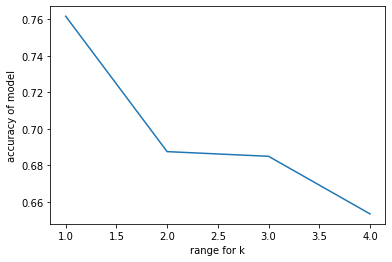

In [30]:
plt.plot(range(1,5), score_list)
plt.xlabel("range for k")
plt.ylabel("accuracy of model")

In [45]:
clf = DecisionTreeClassifier()

clf.fit(tfidf_train, y_train)


DecisionTreeClassifier()

In [47]:
y_pred2 = clf.predict(tfidf_test)

a= accuracy_score(y_test,y_pred2)


In [52]:
print(a)
true_news["news"] = 1
fake_news["news"] = 0
news1 = pd.concat((true_news, fake_news))
news1.head()



0.9971046770601336


,title,text,subject,date,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<AxesSubplot:xlabel='subject', ylabel='count'>

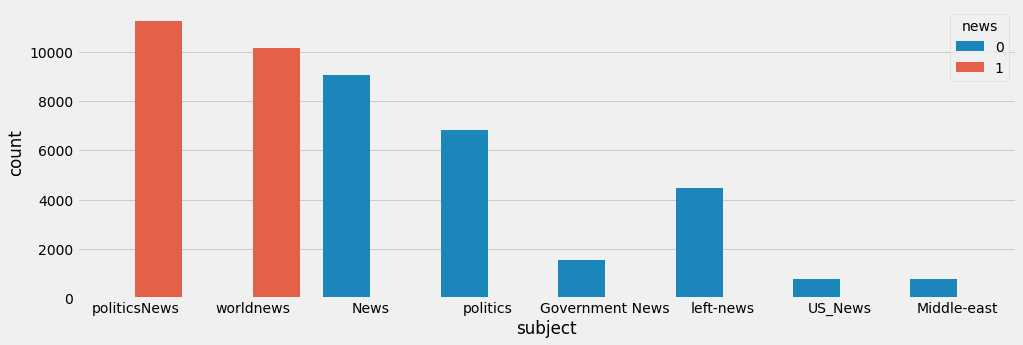

In [53]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,5))
sns.countplot(x="subject", data=news1, hue="news")